<a href="https://colab.research.google.com/github/amogh-panchagatti/first/blob/main/omp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
N=64
N_cs=128
T=14
phi_min = -60*(np.pi/180) #Lower-bound of AoAs
phi_max = 60*(np.pi/180) #Upper-bound of AoAs
std_alpha = np.sqrt(0.5) 
noise = np.sqrt(0.5)
W_real=np.random.normal(0,1,((N,T)))
W_complex=np.random.normal(0,1,((N,T)))
x=np.zeros((N_cs,1))
W=W_real+1j*W_complex
norm_W_colum=np.linalg.norm(W,axis=0)
W=W/norm_W_colum

A_BS, phi, A_BS_OS, phi_OS=func_codedesign_cont(N_cs,N_cs,phi_min,phi_max,N)
SNR=np.linspace(-10,25,8)
Pvec = 10**(SNR/10)
MSE=np.zeros(8)
SNR_index=0
for P in Pvec:

  sum=0
  for  i in range(10000):
    angle_vector=np.random.randint(1,N_cs,1)[0]
    alpha=np.random.normal(0,std_alpha,1)[0]+1j*np.random.normal(0,std_alpha,1)[0]
    v=np.random.normal(0,noise,1)[0]+1j*np.random.normal(0,noise,1)[0]
    y=((P**0.5)*(np.matrix.conjugate(W).T)*alpha@A_BS[:,angle_vector])+v

    A=(np.matrix.conjugate(W).T)@A_BS
    norm_A_colum=np.linalg.norm(A,axis=0)
    A=A/norm_A_colum
    S,r=OMP(A,y,T,N_cs)
    phi_hat=phi[S[0]]
    phi_real=phi[angle_vector]
    sum+=(phi_hat-phi_real)**2

    


  
  MSE[SNR_index]=sum/10000
  SNR_index+=1



















In [2]:
def func_codedesign_cont(delta_inv,delta_inv_OS,phi_min,phi_max,N):
    delta_theta = (phi_max-phi_min)/delta_inv;
    phi = np.linspace(start=phi_min+delta_theta/2,stop=phi_max-delta_theta/2,num=delta_inv) 
    from0toN = np.float32(list(range(0, N)))
    A_BS = np.zeros([N,delta_inv],dtype=np.complex64)
    for i in range(delta_inv):
        a_phi = np.exp(1j*np.pi*from0toN*np.sin(phi[i]))
        A_BS[:,i] = np.transpose(a_phi)

    delta_theta = (phi_max-phi_min)/delta_inv_OS
    phi_OS = np.linspace(start=phi_min+delta_theta/2,stop=phi_max-delta_theta/2,num=delta_inv_OS)  
    A_BS_OS = np.zeros([N,delta_inv_OS],dtype=np.complex64)
    for i in range(delta_inv_OS):
        a_phi = np.exp(1j*np.pi*from0toN*np.sin(phi_OS[i]))
        A_BS_OS[:,i] = np.transpose(a_phi)
        
    return A_BS, phi, A_BS_OS, phi_OS   

In [ ]:
np.random.randint(1,N_cs,1)[0]

1205

In [3]:
def OMP(A,b,M,N):
  #initialization
  r=b
  
  k=0
  S=[]
  A_s=np.zeros((M,1))
  x=np.zeros((N,1))
  S.append(np.argmax((np.abs(A.T@r))))
   


      
    


  return S,r

In [ ]:
MSE

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
MSE[0]=2

In [ ]:
MSE

array([2., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
MSE

array([0.36074565, 0.35854928, 0.35881896, 0.37546742, 0.35559124,
       0.35011904, 0.35125183, 0.35720787])

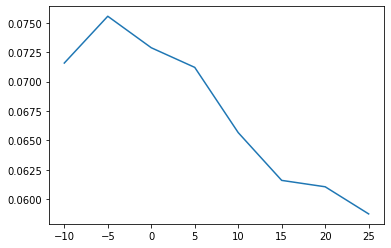

In [5]:
import matplotlib.pyplot as plt
plt.plot(SNR,MSE/10)

In [ ]:

print(Pvec)


[1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02]
